In [37]:
import pandas as pd   
import matplotlib.pyplot as plt           
import numpy as np         
import seaborn as sns   

from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
df = pd.read_csv(r"E:\Python\ML\Real_Estate.csv")
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [39]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [40]:
df.shape

(414, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [42]:
df.isna().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.drop("Transaction date", axis =1, inplace = True)

In [45]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405072,11.757670,0.000000,9.900000,16.450000,30.375000,42.700000
Distance to the nearest MRT station,414.0,1064.468233,1196.749385,23.382840,289.324800,506.114400,1454.279000,6306.153000
Number of convenience stores,414.0,4.265700,2.880498,0.000000,2.000000,5.000000,6.750000,10.000000
Latitude,414.0,24.973605,0.024178,24.932075,24.952422,24.974353,24.994947,25.014578
Longitude,414.0,121.520268,0.026989,121.473888,121.496866,121.520912,121.544676,121.565321
House price of unit area,414.0,29.102149,15.750935,0.000000,18.422493,30.394070,40.615184,65.571716


In [47]:
num_col = df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

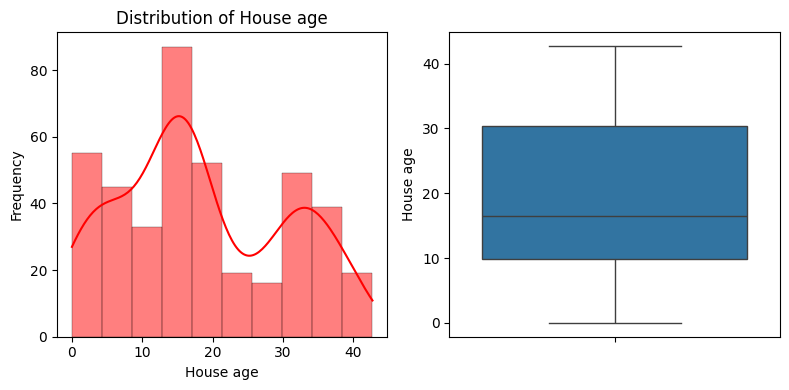

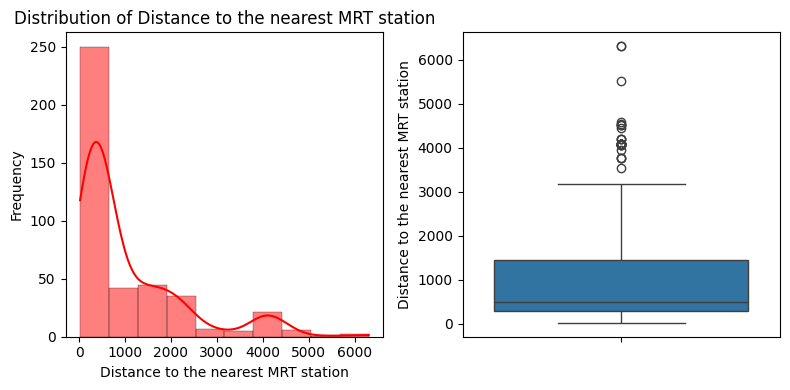

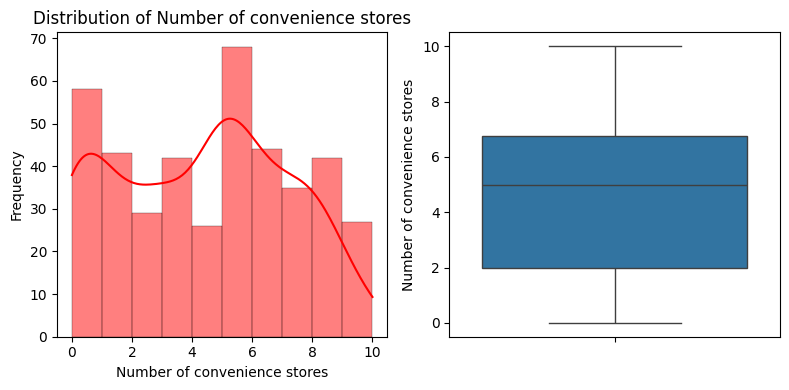

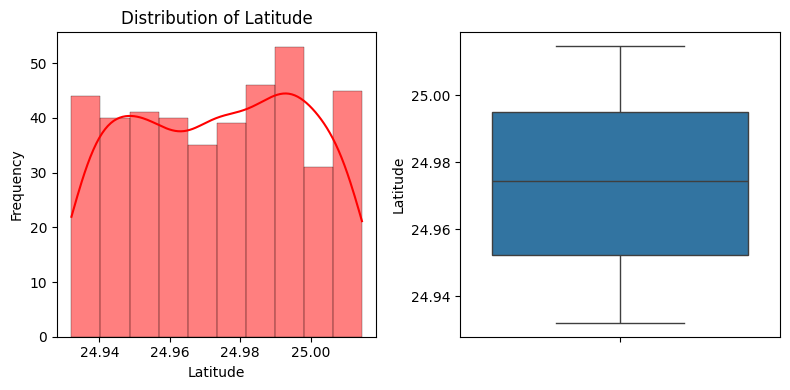

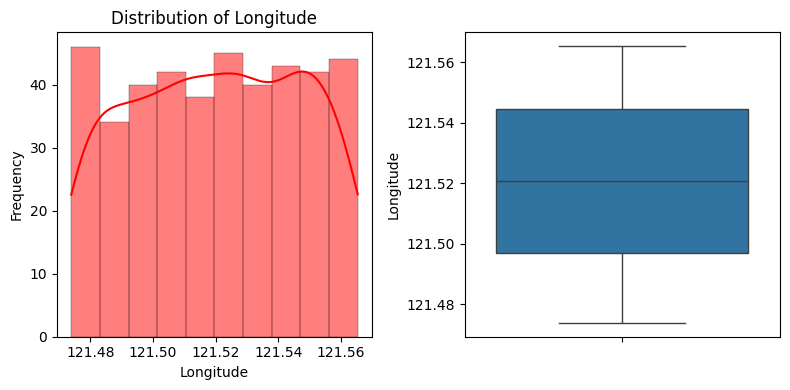

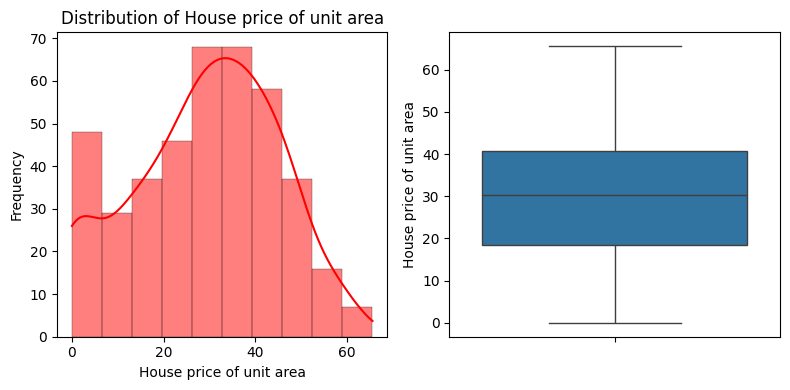

In [48]:
for col in num_col:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x =col, bins = 10, kde=True, edgecolor='black', alpha = 0.5, lw=0.2, color = 'Red')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(df[col])

    plt.tight_layout()
    plt.show()

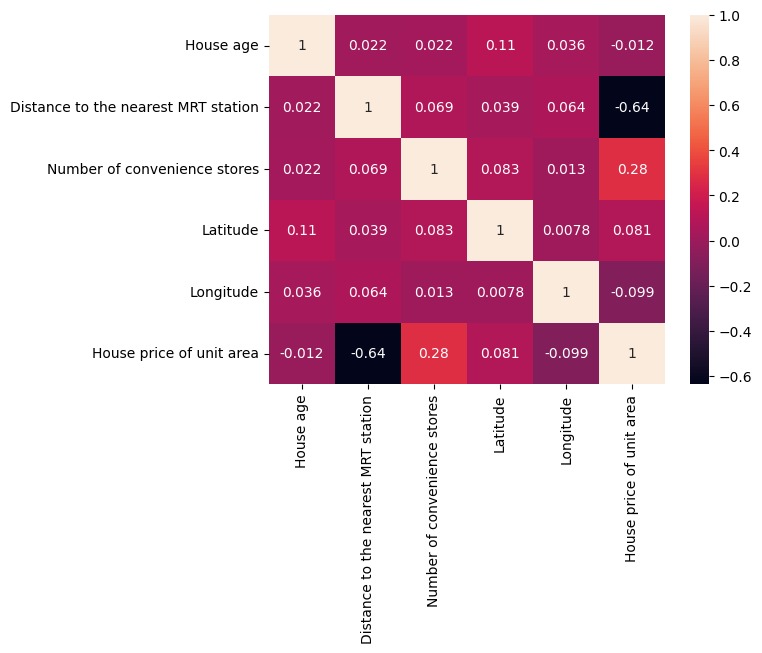

In [49]:
corr = df[num_col].corr()

sns.heatmap(corr, annot = True)
plt.show()

<Axes: xlabel='House age', ylabel='House price of unit area'>

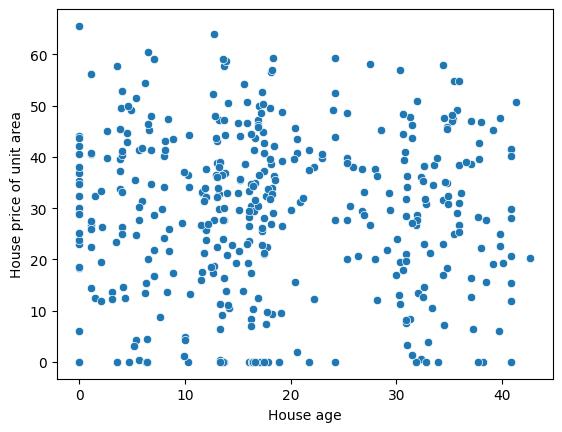

In [50]:
#there is some distribution in points
sns.scatterplot(data=df, x = 'House age', y = "House price of unit area")

<Axes: xlabel='Number of convenience stores', ylabel='House price of unit area'>

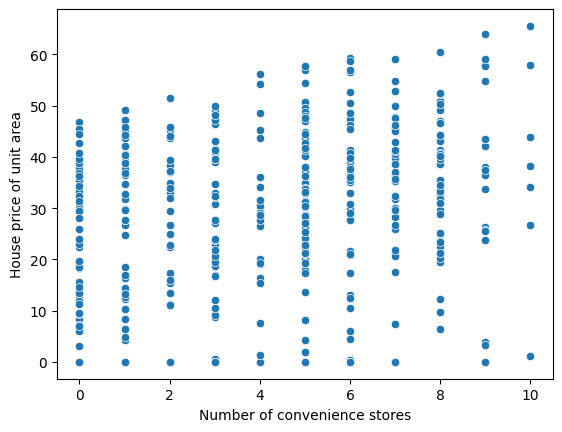

In [51]:
#can't apply linear regression here since it has no scatter, for any x there are many y
sns.scatterplot(data=df, x = 'Number of convenience stores', y = "House price of unit area")

<Axes: xlabel='Distance to the nearest MRT station', ylabel='House price of unit area'>

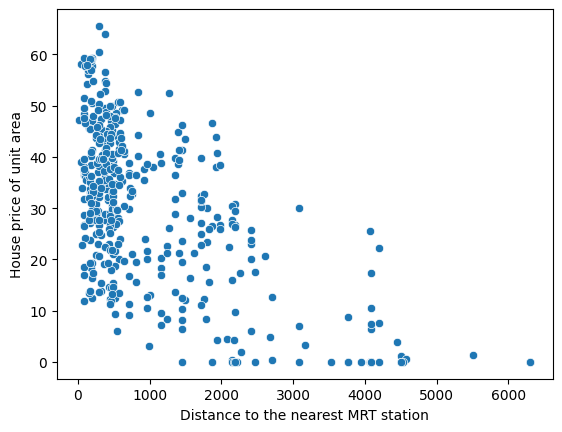

In [52]:
#right skewed and shows strong negative correlation
sns.scatterplot(data=df, x = 'Distance to the nearest MRT station', y = "House price of unit area")

<Axes: xlabel='Latitude', ylabel='House price of unit area'>

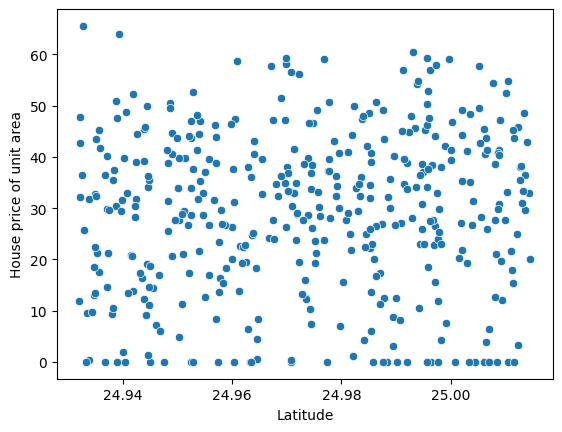

In [53]:
sns.scatterplot(data=df, x = 'Latitude', y = "House price of unit area")

<Axes: xlabel='Longitude', ylabel='House price of unit area'>

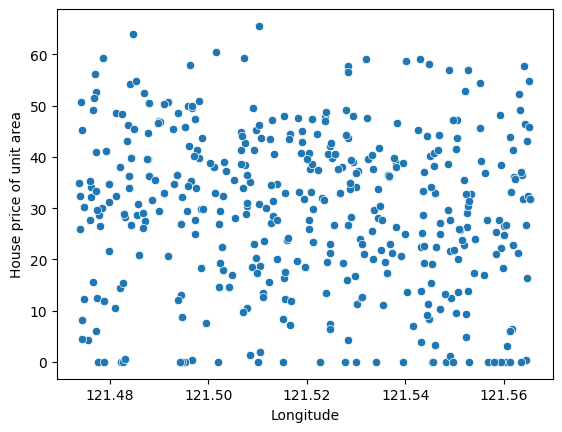

In [54]:
sns.scatterplot(data=df, x = 'Longitude', y = "House price of unit area")

In [55]:
df.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [56]:
x= np.array(df['Distance to the nearest MRT station'])
y = np.array(df['House price of unit area'])

def slope(x,y):
    x_ = np.mean(x)
    y_ = np.mean(y)
    rise=sum([((x-x_)*(y+y_)) for x,y in zip(x,y)])
    run = sum([((x-x_)**2) for x in x])
    m = rise/run
    return m
        
m = slope(x,y)
m

np.float64(-0.008378296105097847)

In [57]:
print(m)

-0.008378296105097847


In [58]:
def intercept(x,y,m):
    x_ = np.mean(x)
    y_ = np.mean(y)
    c = y_ - m*x_
    return c

c = intercept(x,y,m)

In [59]:
def func1(x,m,c):
    df['house_price_predicted'] = m * df['Distance to the nearest MRT station'] + c
    return df['house_price_predicted']
df['house_price_predicted']=func1(df['Distance to the nearest MRT station'],m,c)


In [60]:
z =np.array(df['house_price_predicted'])
z

array([  3.8202483 ,  35.72480489,  21.44268714,  29.18091494,
        29.91541502,  35.68158797,  34.85529527,  33.39209707,
        32.84746342,  35.30890125,  31.73626676,  35.59652983,
        37.60450369,  34.88844567,  36.46699458,  32.66165459,
        26.62493139,   3.84200673,  36.8154588 ,  36.39867041,
        35.25502545,  27.66027933,  31.00188481,  36.39867041,
        36.36893332,   6.41852548,  17.837322  ,  33.66837473,
        21.44268714,  21.76878718,  36.59014296,  22.70238072,
        35.85741991,  35.59652983,  28.32875844,   0.23145543,
        33.97588836,  34.15733293,  35.68158797,  25.89478802,
        33.89651909,  37.26271102,  33.51475532,  25.87437849,
        16.10743845,  34.62558082,  33.92717192,  29.53050772,
        37.26271102,  19.79753329,  32.08952672,  34.88844567,
        34.84053355,   2.85394589,  28.30632974,  34.54402481,
        37.26271102,  12.23070868,  36.30997777,  22.3763477 ,
        15.33724682,   3.8202483 ,  34.72572492,   3.82

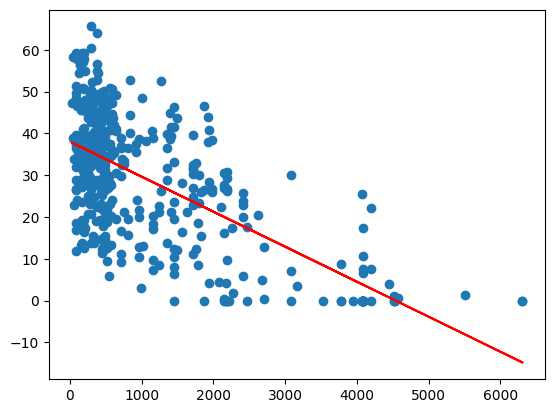

In [61]:
plt.scatter(x=df['Distance to the nearest MRT station'],y=df['House price of unit area'])
plt.plot(x, z, color='red')

In [62]:
#accuracy
def r2(x,y,z):
    y_ = np.mean(y)
    ss_res = sum((y-z)**2)
    ss_total = sum((y-y_)**2)
    a = (1 - ss_res/ss_total)
    return a
print(r2(x,y,z))


0.40523332667211265


In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(y,z)
r2

0.4052333266721131

In [64]:
def slope1(x,y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x*y)
    sum_x2 = sum(x**2)
    rise = n*sum_xy-sum_x*sum_y
    run = n*sum_x2-sum_x**2
    slope = rise/run
    return slope
slope1(x,y)

np.float64(-0.008378296105097854)

In [65]:
df.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'house_price_predicted'],
      dtype='object')

In [66]:
from sklearn.linear_model import LinearRegression
X= np.array(df['Distance to the nearest MRT station']).reshape(-1,1)
Y= np.array(df['House price of unit area']).reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [67]:
slope = model.coef_
slope

array([[-0.0083783]])

In [68]:
def slope(x,y):
    x_ = np.mean(x)
    y_ = np.mean(Y)
    rise=sum([((x-x_)*(y+y_)) for x,y in zip(x,y)])
    run = sum([((x-x_)**2) for x in x])
    m = rise/run
    return m
        
m = slope(df['House age'],y)
m

np.float64(-0.01645615998067539)

In [69]:
intercept = model.intercept_
intercept

array([38.02057867])

In [70]:
df

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,house_price_predicted
0,13.3,4082.01500,8,25.007059,121.561694,6.488673,3.820248
1,35.5,274.01440,2,25.012148,121.546990,24.970725,35.724805
2,1.1,1978.67100,10,25.003850,121.528336,26.694267,21.442687
3,22.2,1055.06700,5,24.962887,121.482178,38.091638,29.180915
4,8.5,967.40000,6,25.011037,121.479946,21.654710,29.915415
...,...,...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798,29.096310,36.595188
410,11.9,323.69120,2,24.950070,121.483918,33.871347,35.308598
411,0.0,451.64190,8,24.963901,121.543387,25.255105,34.236589
412,35.9,292.99780,5,24.997863,121.558286,25.285620,35.565756


In [71]:
model.predict([[1978.6710]])

array([[21.44268714]])

In [72]:
y_pred = model.predict(X)
y_pred

array([[  3.8202483 ],
       [ 35.72480489],
       [ 21.44268714],
       [ 29.18091494],
       [ 29.91541502],
       [ 35.68158797],
       [ 34.85529527],
       [ 33.39209707],
       [ 32.84746342],
       [ 35.30890125],
       [ 31.73626676],
       [ 35.59652983],
       [ 37.60450369],
       [ 34.88844567],
       [ 36.46699458],
       [ 32.66165459],
       [ 26.62493139],
       [  3.84200673],
       [ 36.8154588 ],
       [ 36.39867041],
       [ 35.25502545],
       [ 27.66027933],
       [ 31.00188481],
       [ 36.39867041],
       [ 36.36893332],
       [  6.41852548],
       [ 17.837322  ],
       [ 33.66837473],
       [ 21.44268714],
       [ 21.76878718],
       [ 36.59014296],
       [ 22.70238072],
       [ 35.85741991],
       [ 35.59652983],
       [ 28.32875844],
       [  0.23145543],
       [ 33.97588836],
       [ 34.15733293],
       [ 35.68158797],
       [ 25.89478802],
       [ 33.89651909],
       [ 37.26271102],
       [ 33.51475532],
       [ 25

In [73]:
from sklearn.metrics import r2_score

r2_sklearn = r2_score(Y,y_pred)
print(r2_sklearn)

0.4052333266721131


In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

lin2=LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

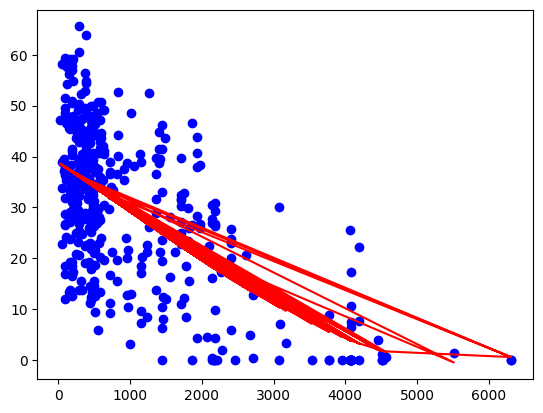

In [75]:
plt.scatter(X,y, color='b')
plt.plot(X,lin2.predict(poly.fit_transform(X)), color='r')